In [12]:
import numpy as np

#print numpy version
np.__version__
# manual page
#np?

import array
L=list(range(10))
A=array.array('i',L)
type(A)


array.array

In [34]:
np.array(['1',2,3,4,5,6],dtype="float32")
np.array([range(i,i+4) for i in [2,3,4]])

#create ndarray efficent zero
np.zeros(10,dtype=int)
#same thing up but with ones

np.ones(100,dtype="float32")

np.ones((4,4),dtype="float32")

#same thing but wiht a sing values
np.full((4,4),99)

#arange
np.arange(0,20,2)


#lineare spatial
np.linspace(0,1,5)

#random
np.random.random((5,5))

# Create a 3x3 array of normally distributed random values
# with mean 0 and standard deviation 1
np.random.normal(0,1,(3,3))

#random interger
np.random.randint(0,10,(3,3))
#identity matrix
np.eye(5)

#empty matrix
np.empty(4)

array([0.25, 0.5 , 0.75, 1.  ])

In [39]:
#numpy array contain values of a single type, the type could be
#int16,int32,int64, ....
np.zeros((10,2),dtype='complex128')

array([[0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])

In [54]:
np.random.seed(123)

x1=np.random.randint(10,size=6)
x2=np.random.randint(10,size=(3,4))
x3=np.random.randint(10,size=(3,4,5))

def print_all(x):
    print("x ndim",x.ndim,x)
    print("x shape",x.shape)
    print("x size",x.size)
    print("x type",x.dtype)
    print("itemsize",x.itemsize,"bytes")
    print("nbytes",x.nbytes,"bytes")

print_all(x2)

#row, col
x2[2,-1]=33.41443
x2#truncated

x ndim 2 [[6 1 0 1]
 [9 0 0 9]
 [3 4 0 0]]
x shape (3, 4)
x size 12
x type int32
itemsize 4 bytes
nbytes 48 bytes


array([[ 6,  1,  0,  1],
       [ 9,  0,  0,  9],
       [ 3,  4,  0, 33]])

In [80]:
x=np.arange(10)
x[5:]
x[:5]
print(x)
x[4:7]
x[::2]
x[1::2]
x[::-1]
x[5::-2]

print(x2)
x2[:,::2]
x2[::-1,::-1]

print(x2[:,0])
print(x2[0,:])

x2_sub=x2[:2,:2]
print("Sub\n",x2_sub)
x2_sub[0]=3123
x2
x2_sub_realcopy=x2[:2,:2].copy()
print(x2_sub_realcopy)
x2_sub_realcopy[0]=555
print(x2,x2_sub_realcopy)

[0 1 2 3 4 5 6 7 8 9]
[[3123 3123    0    1]
 [   9    0    0    9]
 [   3    4    0   33]]
[3123    9    3]
[3123 3123    0    1]
Sub
 [[3123 3123]
 [   9    0]]
[[3123 3123]
 [   9    0]]
[[3123 3123    0    1]
 [   9    0    0    9]
 [   3    4    0   33]] [[555 555]
 [  9   0]]


In [105]:
#reshaping array
grid=np.arange(1,10).reshape((3,3))
print(grid)
x=np.array([1,2,3])
print(x)
x.reshape((1,3))
x[np.newaxis,:]
x.reshape((3,1))

##concatenation of arrays 1-dim
x=np.array([1,2,3])
y=np.array([4,5,6])
np.concatenate([x,y])
z=[99,99,99]
np.concatenate([x,y,z])
#even 2 dimensional
grid=np.array([[1,2,3],
              [4,5,6]])
np.concatenate([grid,grid],axis=1) # i can decided of which axis

x=np.array([1,2,3])
grid=np.array([[9,8,7],
              [6,5,4]])
y=np.array([[99],[99]])
np.vstack([x,grid]) #vertical stack when concatenat mixed dim
np.hstack([y,grid])
#d stack 3 axis

##splitting hsplit,vsplit
x=[1,2,3,99,99,3,2,1]
#pass a list of indices of splitting point
x1,x2,x3=np.split(x,[3,6])
print(x1,x2,x3)

grid=np.arange(16).reshape((4,4))
grid
upper,lower=np.vsplit(grid,[2])
print(upper,lower)


left,right=np.hsplit(grid,[2])
print(left,right)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 2 3]
[1 2 3] [99 99  3] [2 1]
[[0 1 2 3]
 [4 5 6 7]] [[ 8  9 10 11]
 [12 13 14 15]]
[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]] [[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


In [114]:
##ufunc

np.random.seed(0)

def compute_reciprocals(values):
    output=np.empty(len(values))
    for i in range(len(values)):
        output[i]=1.0/values[i]
    return output

values=np.random.randint(1,10,size=5)
print(values)
compute_reciprocals(values)
#measuring time with big array
big_array=np.random.randint(1,100,size=10)
%timeit print(compute_reciprocals(big_array))
%timeit print(1.0/big_array)
#vectorized op


[6 1 4 4 8]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.0769

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.0769

[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.0769

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.0769

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.0769

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.0769

[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.0769

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.01136364 0.01408451
 0.01123596 0.01123596 0.07692308 0.01694915]
[0.1        0.01190476 0.04545455 0.02702703 0.011

In [133]:
np.arange(5)/np.arange(1,6)
x=np.arange(9).reshape((3,3))
2**x
x=np.arange(5)
x-5
x//2
x**2
2**x
-(0.5*x+1)**2
np.add(x,2)
x=np.arange(10000)
%timeit np.multiply(x,3)
%timeit x*3



11.4 µs ± 1.43 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
10.7 µs ± 218 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [155]:
theta=np.linspace(0.1,np.pi,3)
print("theta   =",theta)
print("sin(theta)=",np.sin(theta))
print("cos(theta)=",np.cos(theta))
print("tan(theta)=",np.tan(theta))
print("e^x =",np.exp(theta))
print("tan(theta)=",np.power(3,theta))
print("e^x =",np.log(theta))
print("tan(theta)=",np.log2(theta))

x=np.arange(5)
y=np.empty(len(x))
np.multiply(x,10,out=y)
y=np.zeros(10)
np.power(2,x,out=y[::2])
np.add.reduce(x)
np.multiply.reduce(x)
#accumulate ...

x=np.arange(1,6)
np.multiply.outer(x,x)
sum(x)

big_array=np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array) #faster manco a dirlo =)

np.min(np.random.rand(100000))


theta   = [0.1        1.62079633 3.14159265]
sin(theta)= [9.98334166e-02 9.98750260e-01 1.22464680e-16]
cos(theta)= [ 0.99500417 -0.04997917 -1.        ]
tan(theta)= [ 1.00334672e-01 -1.99833306e+01 -1.22464680e-16]
e^x = [ 1.10517092  5.05711583 23.14069263]
tan(theta)= [ 1.11612317  5.93357419 31.5442807 ]
e^x = [-2.30258509  0.48291759  1.14472989]
tan(theta)= [-3.32192809  0.69670281  1.65149613]
258 ms ± 34.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.29 ms ± 30.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


1.884174132804617e-05

[[0.07735258 0.26260323 0.5762878  0.01086637]
 [0.59358575 0.88118789 0.66388102 0.32645221]
 [0.8815258  0.74883265 0.03073537 0.74854719]]
[0.92710998 2.46510687 2.409641  ]


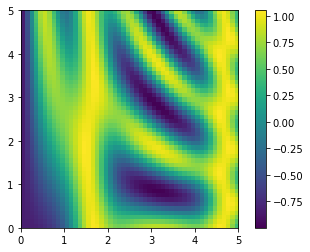

In [170]:
M=np.random.random((3,4))
print(M)

M.sum(axis=0) ## column
print(M.sum(axis=1)) ## row
M[:1].sum()

#!head -4 data/president_heights.csv

a=np.array([0,1,2])
b=np.array([5,6,7])
a+b
a=np.arange(3)
b=np.arange(3).reshape(3,1)
b
x=np.linspace(0,5,50)
y=np.linspace(0,5,50)[:,np.newaxis]
z=np.sin(x)**10 +np.cos(10+y*x)*np.cos(x)

%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(z,origin='lower',extent=[0,5,0,5],cmap='viridis')
plt.colorbar()

[]

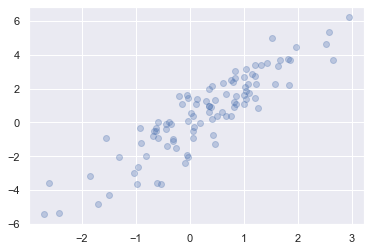

In [187]:
x=x[:10]
x[x<6]

mean=[0,0]
cov=[[1,2],[2,5]]
X=np.random.multivariate_normal(mean,cov,100)
X.shape
import seaborn
seaborn.set()
selection=X[np.random.choice(X.shape[0],20,replace=False)]
plt.scatter(X[:,0],X[:,1],alpha=0.3)
plt.scatter(selection[:,0],selection[:,1],facecolor='none',s=200)

plt.plot()